In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys, re, string
from io import StringIOTT
from pprint import pprint
import operator
import functools
import matplotlib
from matplotlib import rcParams
from datetime import datetime, timedelta, date
#from datetime import timedelta, date

import matplotlib.pyplot as plt
import seaborn as sb 

pd.options.mode.chained_assignment = None

In [2]:

def neg_dur(dur):
    if dur.days < 0.0:   #its matching your condition
        return True
    else:
        return False

In [4]:
#org_df = pd.concat([org_df1,org_df2, org_df3], axis=0)
# load the dataset in df
df = org_df.copy()
df = df.drop(["Carrier", "Report Retreived", "AC_Sect"], axis = 1)
org_len =org_df.shape[0]

In [5]:
#df.rename(columns={'AC_Sect':'ac_sect'}, inplace=True)
df.rename(columns={'Carrier':'carrier'}, inplace=True)
df.rename(columns={'ChrgWt':'charge'}, inplace=True)
df.rename(columns={'Commodity':'commodity'}, inplace=True)
df.rename(columns={'DateShpped':'date_shipped'}, inplace=True)
df.rename(columns={'FA_Destination':'destination'}, inplace=True)
df.rename(columns={'FA_Origin':'origin'}, inplace=True)
df.rename(columns={'FLT_NUM':'flight_num'}, inplace=True)
df.rename(columns={'NatureofGoods':'goods_type'}, inplace=True)
df.rename(columns={'NogCategory':'category'}, inplace=True)
df.rename(columns={'QTYShpped':'shipped_qty'}, inplace=True)
df.rename(columns={'RecvdQTY':'rec_qty'}, inplace=True)
df.rename(columns={'RecvdWtKg':'rec_wt'}, inplace=True)
df.rename(columns={'Recvd_Date':'rec_date'}, inplace=True)
df.rename(columns={'ShpDestination':'ship_destination'}, inplace=True)
df.rename(columns={'ShpOrigin':'ship_origin'}, inplace=True)
df.rename(columns={'WTshppedKGs':'wt_shipped'}, inplace=True)

In [6]:

airports = {'YWP':'Webequie', 'ZPB':'Sachigo Lake', 'KB6':'Angling Lake', 'YLH':'Lansdowne House', 'YFA':'Fort Albany', 'YRL':'Red Lake', 'YYU':'Kapuskasing', 'YAC':'Cat Lake', 'YRS':'Red Sucker Lake', 'YIV':'Island Lake'
 ,'ZTM':'Shamattawa', 'YTL':'Big Trout Lake', 'NE3':'Bearskin Lake', 'JV7':'Summer Beaver', 'ZMD':'Muskrat Dam' , 'KL3': 'Wunnumin Lake', 'NM5':'Kingfisher Lake', 'PV7': 'Poplar Hill' , 'YGO':'Gods Lake Narrows', 'YFH':'Fort Hope'
 ,'YPL':'Pickle Lake', 'ZSJ':'Sandy Lake', 'YAQ':'Kasabonika', 'YXL': 'Sioux Lookout' , 'YER': 'Fort Severn' , 'ZKE': 'Kashechewan' , 'PV8': 'Keewaywin' , 'YVZ': 'Deer Lake' , 'ZRJ': 'Round Lake', 'YQT': 'Thunder Bay'
 ,'YPM':'Pikangikum', 'KQ3':'North Spirit Lake', 'YPO':'Peawanuck', 'YKP':'Ogoki Post' , 'YOH': 'Oxford House' , 'ZGI': 'Gods River' , 'ZAC': 'York Landing' , 'ZGR': 'Little Grand Rapids' , 'YYQ':'Churchill', 'ZWH': 'Lac Brochet'
 ,'YBT':'Brochet', 'YMO':'Moosonee', 'YAT':'Attawapiskat', 'YTH':'Thompson', 'YST': 'St. Theresa Point' , 'YBQ': 'Tadoule Lake' , 'YNN': 'Lynn Lake' , 'YWJ': 'Déline', 'ZFN':'Tulita'
 ,'YBK':'Baker Lake', 'YRT':'Rankin Inlet', 'YVQ':'Norman Wells', 'YGH':'Fort Good Hope', 'YEK': 'Arviat' , 'YAB': 'Arctic Bay' , 'YUX': 'Hall Beach' , 'YYH': 'Taloyoak', 'YIO':'Pond Inlet'
 ,'YHK':'Gjoa Haven', 'YCS':'Chesterfield Inlet', 'YGT':'Igloolik', 'YZF':'Yellowknife' , 'YZS': 'Coral Harbour' , 'YCB': 'Cambridge Bay' , 'YUT': 'Repulse Bay' , 'ZSN': 'South Indian Lake'
 , 'KD9' : 'Slate Falls', 'YNN': 'Nejanilini Lake, MB', 'YQN':'Nakina', 'YFB': 'Iqaluit', 'YWG': 'Winnipeg'}

Removing unreliable data. We did not consider records that have different origin and shipping origin, destination and shipping destination or records with negative duration (shipping date after recieved date). Also we only considered shipments that are within Canada. 
71.34% of date were reliable. 

In [7]:
#remove data that ship_origin != origin and destination != ship_destination
df = df[(df['origin'] == df['ship_origin']) & (df['destination'] == df['ship_destination'])]
df = df[df['origin'].isin(airports.keys())]
df = df[df['destination'].isin(airports.keys())]
df = df[df.date_shipped > df.rec_date]

In [9]:
df_len = df.shape[0]
df_len*100/org_len


71.3437979058709

In [8]:
df['date']= df['date_shipped'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M'))
#df['day']= df['date'].apply(lambda x: x.day)
df['month']= df['date'].apply(lambda x: x.month)
df['week']= df['date'].apply(lambda x: x.week)
df['year']= df['date'].apply(lambda x: x.year)
df['day']= df['date_shipped'].apply(lambda x: pd.to_datetime(x).day)

In [9]:
df['date_s']= df['date'].apply(lambda x: '-'.join(str(x).split(' ')[0].split('-')[0:3])) #considers days as well
df['date_m']= df['date'].apply(lambda x: '-'.join(str(x).split(' ')[0].split('-')[0:2])) #does not considers days 

df['date_s'] = pd.to_datetime(df['date_s'])
df['date_m'] = pd.to_datetime(df['date_m'])

In [12]:
 df[['month']].groupby([df[df.year == 2020]['month']]).count()

,month
month,
1.0,13514
2.0,14165
3.0,15851
4.0,19422
5.0,23853


In [10]:
 def daterange(date1, date2):
    for n in range(0,int ((date2 - date1).days)+1,7):
        yield date1 + timedelta(n)      
        
def get_weeks_year(df, year0):
    #choose dates of 2016 as a base date, we only use month and day part of it
    week_dates_dict0={}
    week_dates0= []
    start_dt = date(2016, 1, 1)
    end_dt = date(2016, 12, 31) 
    for dt in daterange(start_dt, end_dt):
        week_dates_dict0[dt.strftime("%m-%d")] = 0 #dictionary counts the number of records occured in that period
        week_dates0.append(dt.strftime("%m-%d"))
    df_new_name = "df_date_"+str(year0)
        
    df_year= df[(df.year == year0)]#.date.value_counts().reset_index().values, columns=["date", "records"])
    #df_new_name = df_new_name.sort_index(axis = 0, ascending=False) 



    for i in range(df_year.shape[0]):
        dt = df_year.date.iloc[i]
        for i in range(len(week_dates0)-2):
            date_m_1, date_d_1 = int(week_dates0[i].split('-')[0]), int(week_dates0[i].split('-')[1])
            date_m_2, date_d_2 = int(week_dates0[i+1].split('-')[0]), int(week_dates0[i+1].split('-')[1])
            date_1 = date(year0, date_m_1, date_d_1)
            date_2 = date(year0, date_m_2, date_d_2)
            #print("date_1 is", date_1, "date_2 is", date_2)
            if date_1 <= dt < date_2:
                week_dates_dict0[week_dates0[i]] = week_dates_dict0[week_dates0[i]]+ 1
                #print("actual data is ",dt , "for week ", week_dates0[i], "of year ", year0, "count is ", week_dates_dict0[week_dates0[i]])
                #print('done with year ', year0, "\n\n")
        i = len(week_dates0)-2 #last week of december is upto 31 not 30. Last day would not be counted with d1<= dt< d2 operation
        date_m_1, date_d_1 = int(week_dates0[i].split('-')[0]), int(week_dates0[i].split('-')[1])
        date_1 = date(year0, date_m_1, date_d_1)
        date_2 = date(year0+1, 1, 1)
        #print("date_1 is", date_1, "date_2 is", date_2)
        if date_1 <= dt < date_2:
            week_dates_dict0[week_dates0[i]] = week_dates_dict0[week_dates0[i]]+ 1
            #print("actual data is ",dt , "for week ", week_dates0[i], "of year ", year0, "count is ", week_dates_dict0[week_dates0[i]])
            #print('done with year ', year0, "\n\n")
    return week_dates_dict0



def get_months_year(df, year0):
    #choose these dates as a base date
    months = {}
    for i in range(1,13):
        months[i] = 0


    df_year= df[(df.year == year0)]


    for i in range(df_year.shape[0]):
        dt = df_year.date.iloc[i]
        m = df_year.month.iloc[i]
        
        months[m] = months[m]+1
        #print("actual data is ",dt , "for month ", m, "of year ", year0, "count is ", months[m])
                #print('done with year ', year0, "\n\n")
    return months



In [14]:
weeks_2020 = get_weeks_year(df, 2020)
weeks_2019 = get_weeks_year(df, 2019)
weeks_2018 = get_weeks_year(df, 2018)
weeks_2017 = get_weeks_year(df, 2017)
weeks_2016 = get_weeks_year(df, 2016)
#drop values of last key
del(weeks_2020['12-30'])
del(weeks_2019['12-30'])
del(weeks_2018['12-30'])
del(weeks_2017['12-30'])
del(weeks_2016['12-30'])


months_2020 = get_months_year(df, 2020)
months_2019 = get_months_year(df, 2019)
months_2018 = get_months_year(df, 2018)
months_2017 = get_months_year(df, 2017)
months_2016 = get_months_year(df, 2016)


## Plots for Number of Records

Comparison of every seven days shipped cargo (number of records) in different years. Start week of each week is different. We used 2016 dates as our base date.

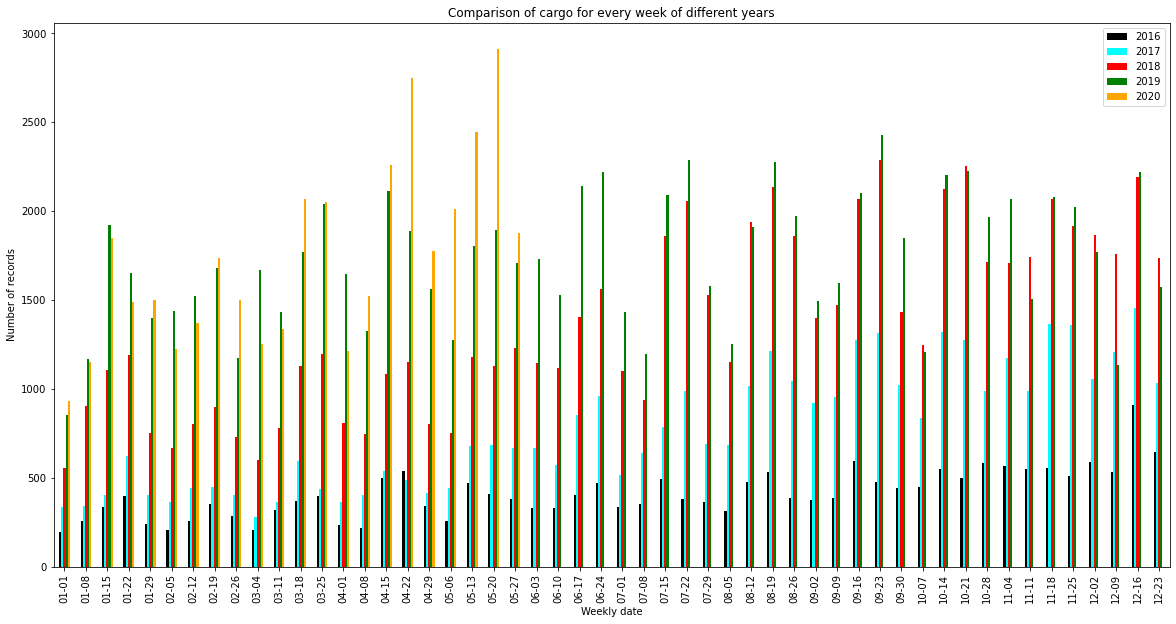

In [15]:
# Used 2016 dates as a base date for plot
week_dates_2016 = list(weeks_2016.keys()) 
#week_dates_2016.remove('12-30')
df_comp_weeks = pd.DataFrame({'2016':list(weeks_2016.values()),'2017':list(weeks_2017.values()), '2018': list(weeks_2018.values()), 
                        '2019' :list(weeks_2019.values()), '2020' : list(weeks_2020.values())
                       }, index = week_dates_2016)
ax = df_comp_weeks.plot.bar(rot=0, figsize=(20,10), color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of cargo for every week of different years")
ax.set_xticklabels(week_dates_2016, rotation=90)
plt.xlabel('Weekly date') #not necessarly start of the week, it is just comparison of different years within same 7 days span
plt.ylabel('Number of records');

<Figure size 1280x640 with 0 Axes>

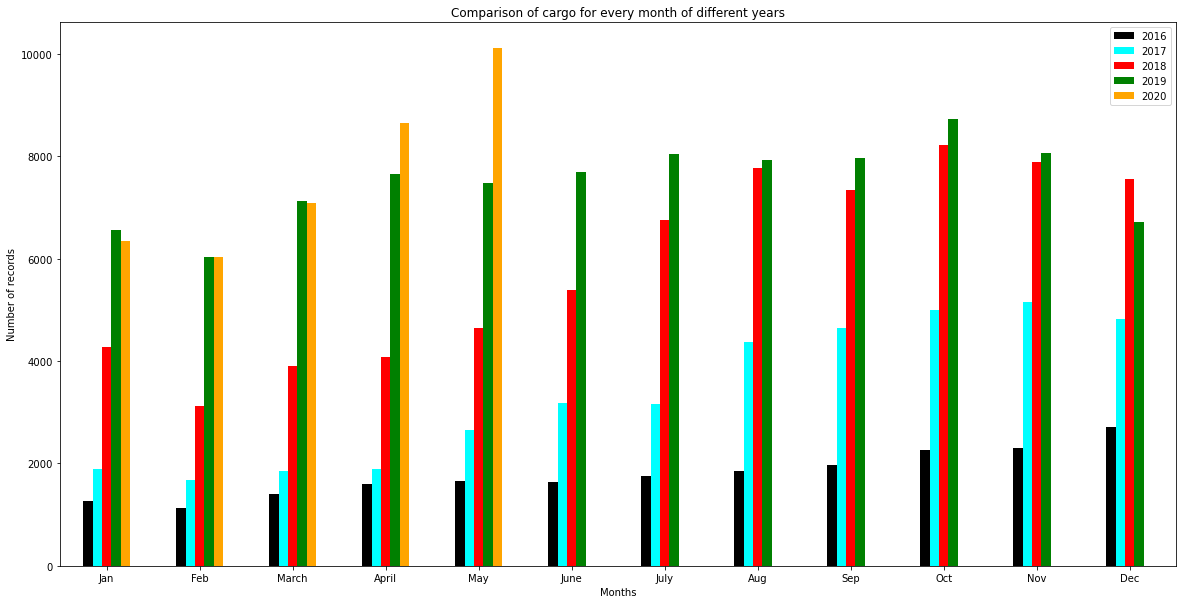

In [16]:
matplotlib.pyplot.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

months = {}
for i in range(1,13):
    months[i] = 0
months_name = ['Jan', "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

    
df_comp_months = pd.DataFrame({'2016':list(months_2016.values()),'2017':list(months_2017.values()), '2018': list(months_2018.values()), 
                        '2019' :list(months_2019.values()), '2020' : list(months_2020.values())
                       }, index = months) #maybe separate months and sort each list or add if in the next line, plot smallest first

#df_comp_months = df_comp_months.sort_values('month',ascending = True)

ax = df_comp_months.plot.bar(rot=0, figsize=(20,10), color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of cargo for every month of different years")

ax.set_xticklabels(months_name, rotation=0)
plt.xlabel('Months')
plt.ylabel('Number of records');


In [17]:
df['month_str'] = df.month.apply(lambda x: str(x))
df['day_str'] = df.day.apply(lambda x: str(x))

In [18]:
years = [2016, 2017, 2018, 2019, 2020]

def get_data_year_count(df, year0):
    new_data = pd.DataFrame(df[(df.year == year0)].date.value_counts().reset_index().values, columns=["date", "records"])
    new_data = new_data.sort_index(axis = 0, ascending=True) 
    return new_data

dict_data_year_count = {}
for y in years:
    dict_data_year_count[y] = get_data_year_count(df, y)


In [19]:

def get_data_year_wt(df, year0):
    new_data = df[df['year'] == year0]
    df_wt_year_s = pd.DataFrame(new_data[['wt_shipped']].groupby([new_data['date_s']]).sum().reset_index().values, columns=["date", "total_weight"])
    #new_data[['wt_shipped']].groupby([new_data['date_s']]).sum()
    df_wt_year_m = df_new = pd.DataFrame(new_data[['wt_shipped']].groupby([new_data['date_m']]).sum().reset_index().values, columns=["date", "total_weight"])
    #new_data[['wt_shipped']].groupby([new_data['date_m']]).sum()
    return df_wt_year_s, df_wt_year_m

dict_data_year_wt_s = {}
dict_data_year_wt_m = {}
for y in years:
    dict_data_year_wt_s[y] = get_data_year_wt(df, y)[0]
    dict_data_year_wt_m[y] = get_data_year_wt(df, y)[1]


Get the weekly date of each year. Here weeks start from Sunday. 

In [20]:
dict_week_dates = {}
start_dt = {}
end_dt = {}

start_dt[2020] = date(2019, 12, 29)
end_dt[2020] = date(2020, 5, 27)

start_dt[2019] = date(2018, 12, 30)
end_dt[2019] = date(2020, 1, 4)

start_dt[2018] = date(2017, 12, 31)
end_dt[2018] = date(2019, 1, 5)

start_dt[2017] = date(2017, 1, 1)
end_dt[2017] = date(2017, 12, 30)

start_dt[2016] = date(2015, 12, 27)
end_dt[2016] = date(2016, 12, 31)


for y in years:    
    dict_week_dates[y] = []
    for dt in daterange(start_dt[y], end_dt[y]):
        dict_week_dates[y].append(dt.strftime("%Y-%m-%d"))


In [21]:
colors = {2020:'orange', 2019:'grey', 2018:'purple', 2017:'green', 2016:'pink'}

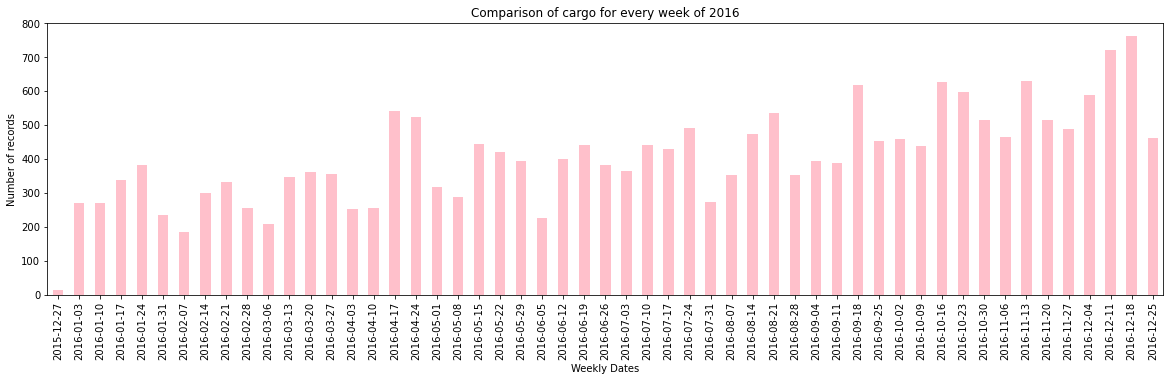

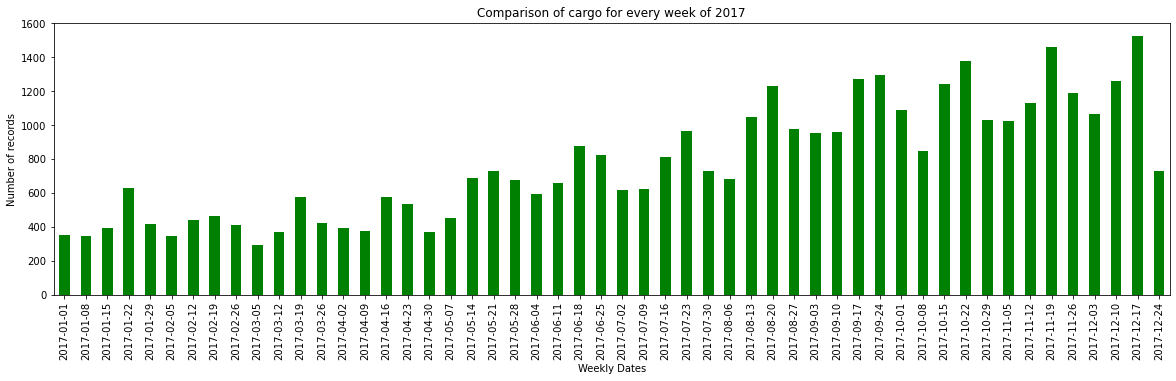

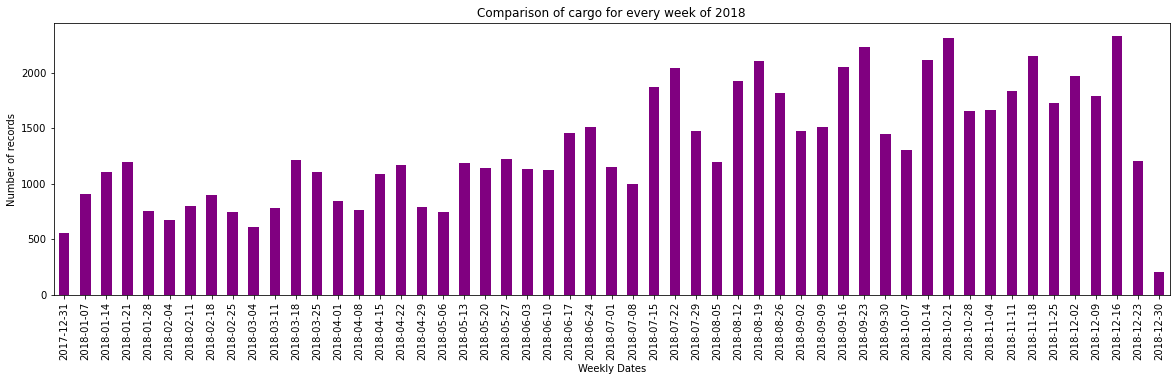

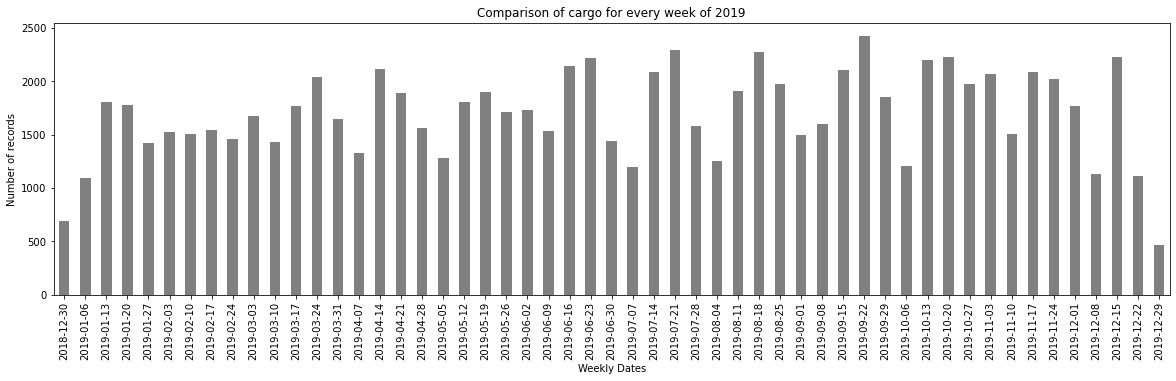

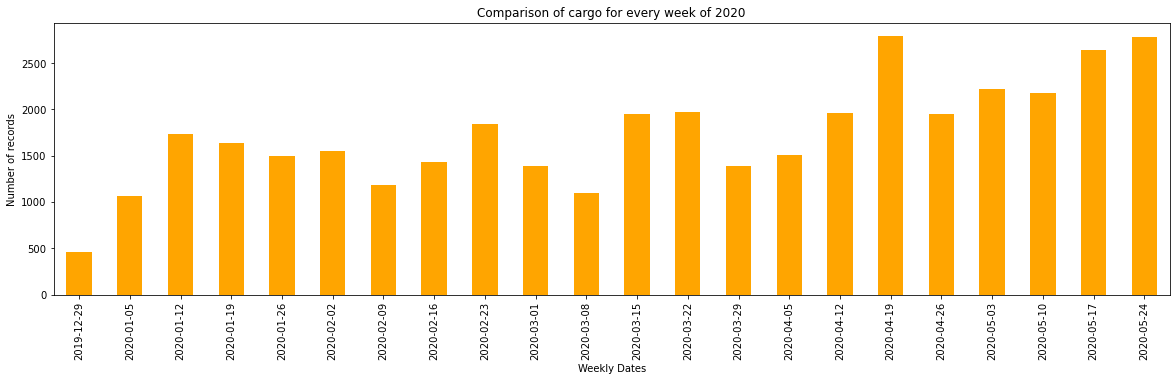

In [22]:
for y in years:
    df_date = dict_data_year_count[y]
    week_dates = dict_week_dates[y]
    df1 = df_date.sort_values('date').set_index('date')
    week_groups_resample = df1.resample('W').records.sum()


    ax = week_groups_resample.plot(kind='bar', color = colors[y],
                                   figsize=(20,5),legend=None, title = "Comparison of cargo for every week of "+str(y))
    ax.set_xticklabels(week_dates, rotation=90)

    plt.xlabel('Weekly Dates')
    plt.ylabel('Number of records')
    plt.show()


Each bar shows the number of records for the week starting at that date. For example, number of records for the first week of 2020 is 462. Here week starts from Sunday.

## Total Shipped Weight

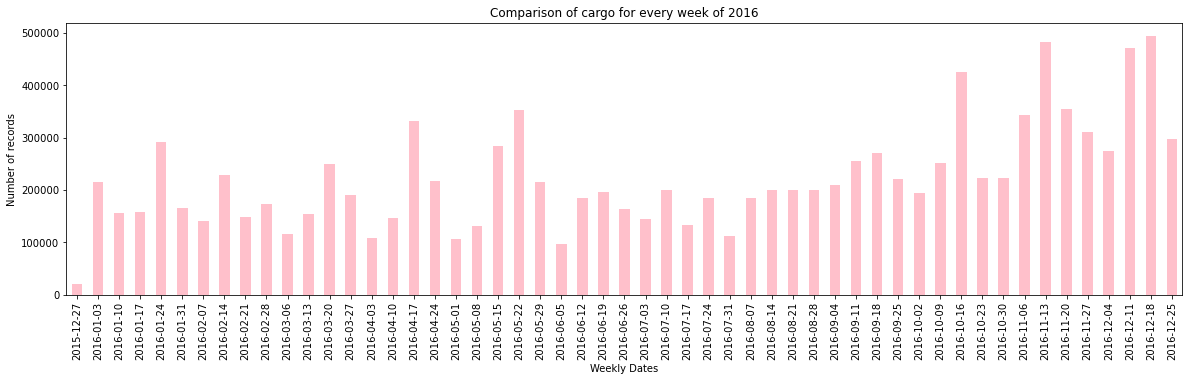

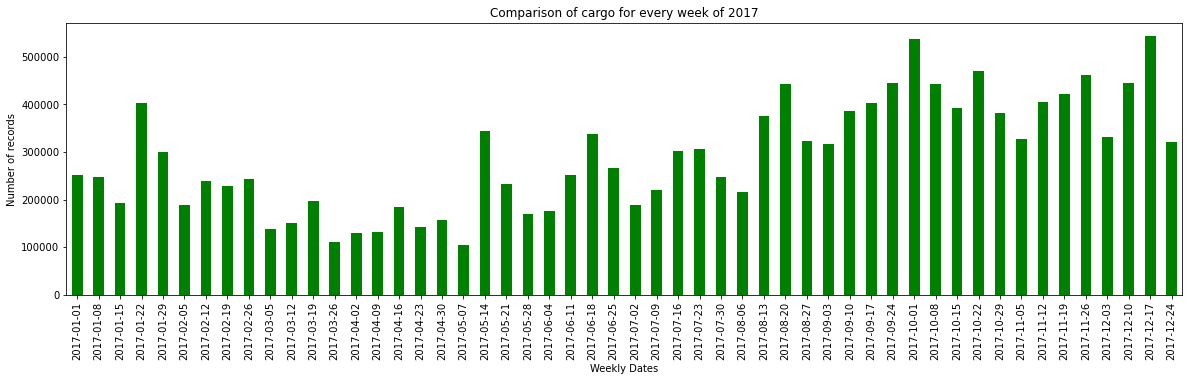

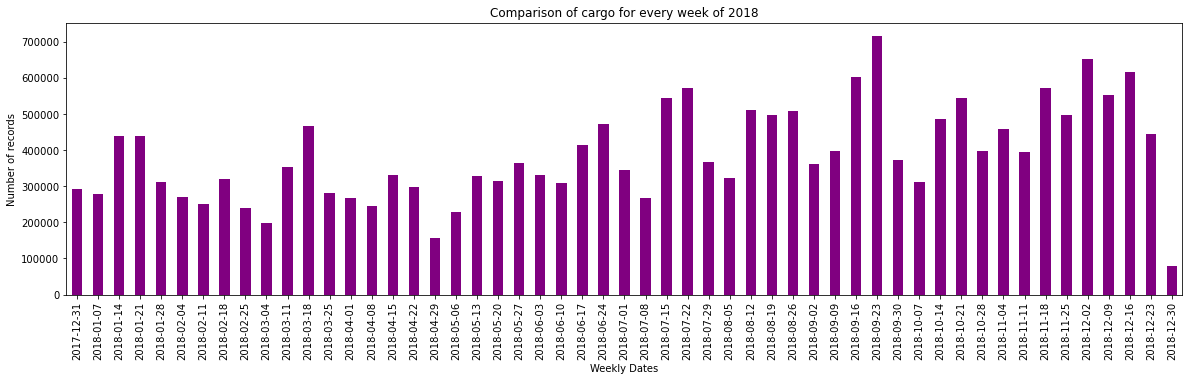

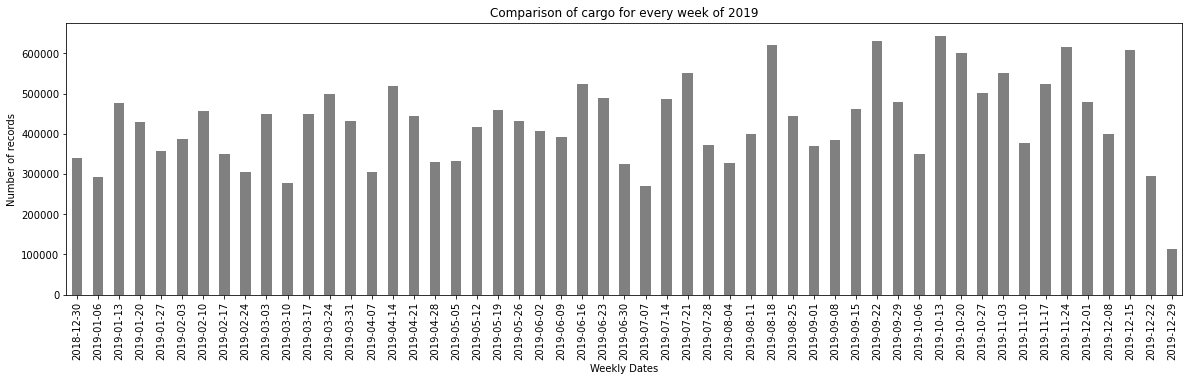

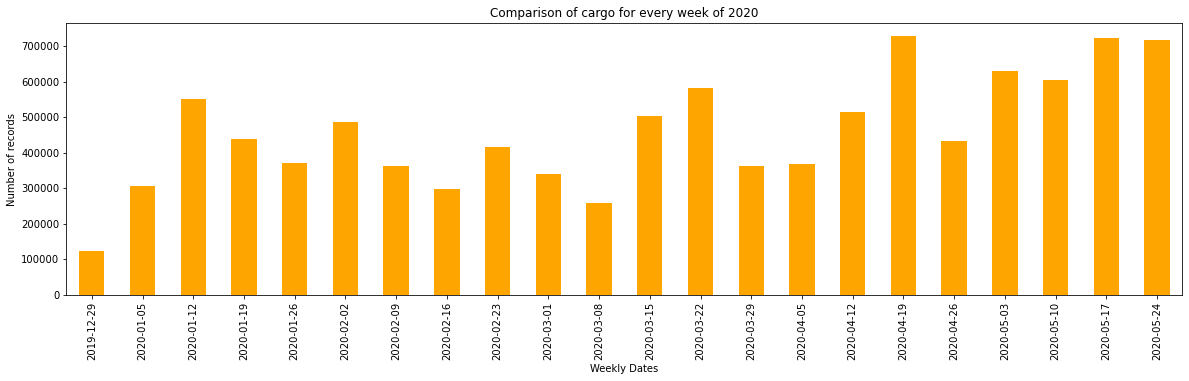

In [23]:
for y in years:
    df_date = dict_data_year_wt_s[y]
    week_dates = dict_week_dates[y]
    df1 = df_date.sort_values('date').set_index('date')
    week_groups_resample = df1.resample('W').total_weight.sum()


    ax = week_groups_resample.plot(kind='bar', color = colors[y],
                                   figsize=(20,5),legend=None, title = "Comparison of total shipped weight for every week of "+str(y))
    ax.set_xticklabels(week_dates, rotation=90)

    plt.xlabel('Weekly Dates')
    plt.ylabel('Number of records')
    plt.show()

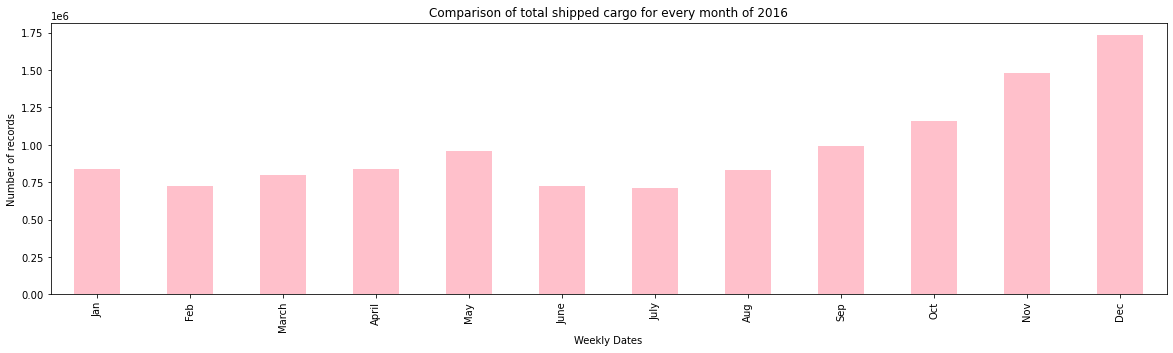

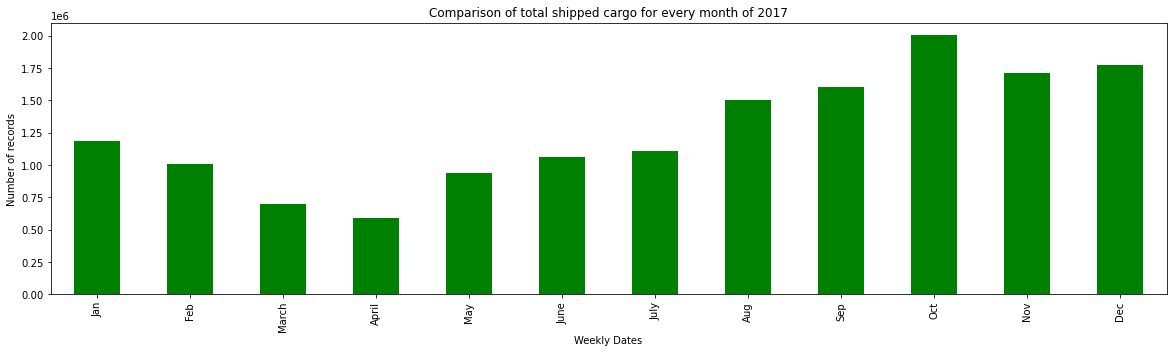

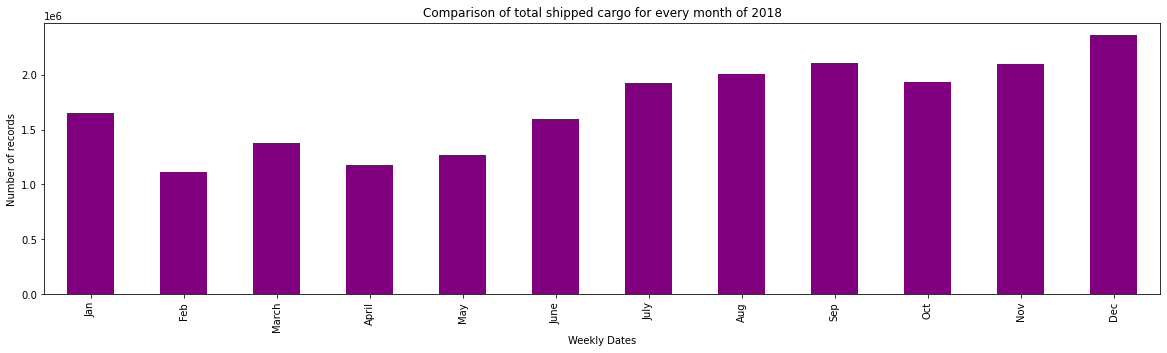

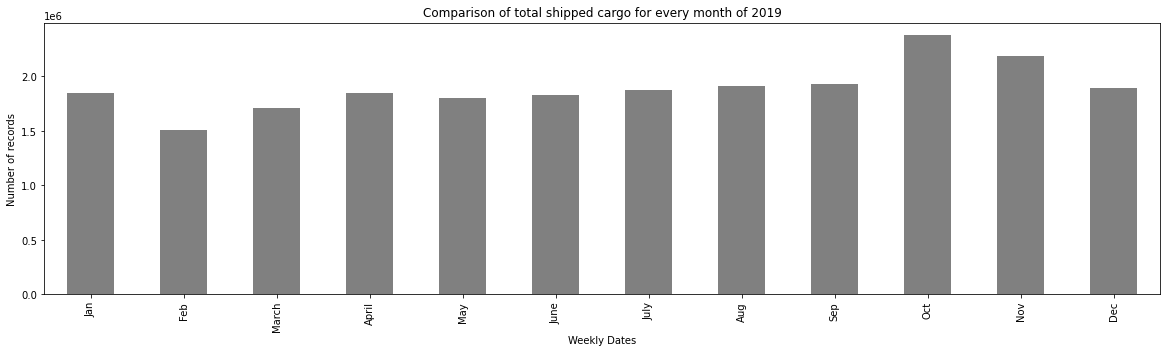

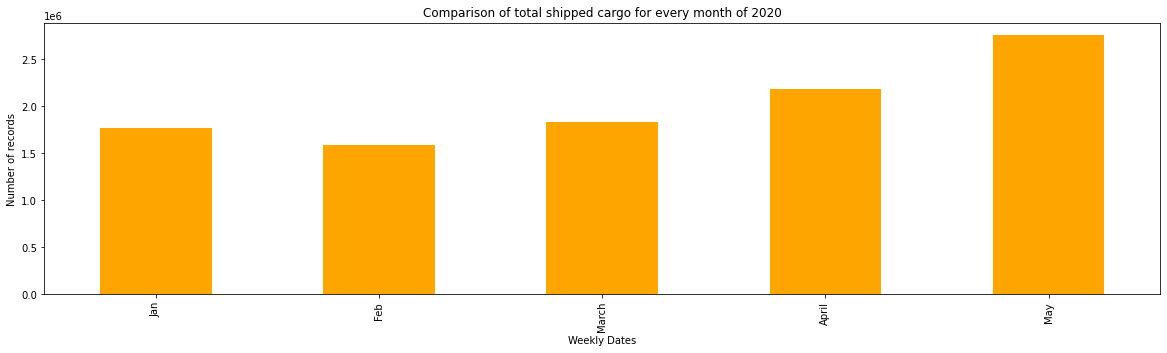

In [24]:
for y in years: 
    if y == 2020:
        months_name_y = months_name[:5]
    else:
        months_name_y = months_name

    df_date = dict_data_year_wt_m[y].total_weight
    ax = df_date.plot(kind='bar', color=colors[y], figsize=(20,5),legend=None, title = "Comparison of total shipped weight for every month of "+str(y))
    ax.set_xticklabels(months_name_y, rotation=90)

    plt.xlabel('Weekly Dates')
    plt.ylabel('Number of records')
    plt.show()

## Different Categories

Based on "goods_type" category, I created a list of common categories.

In [42]:
#Creat the following lists
food_list = #
fuel_list = #

construction_list = #

furniture_list = #

water_list = #

general_list = #

transportation_list = #

mail_list = #

medical_list = #

electronic_list = #

pet_list = #


In [18]:
#lst = {"Food": food_list, "Fuel": fuel_list, "Transportation": transportation_list,"General": general_list, "Furniture": furniture_list, 
       #"Water": water_list, "Construction": construction_list, "Mail": mail_list, "Medical": medical_list}

    


def func_cat(a):
    for i in lst.keys():
        list_i = lst[i]
        if a in list_i:
            return i
    return "Other"


df["goods_category"] = df.goods_type.apply(lambda x: func_cat(x))

In [43]:
#lst = {"Food": food_list, "Fuel": fuel_list, "Transportation": transportation_list,"General": general_list, "Furniture": furniture_list, 
       #"Water": water_list, "Construction": construction_list, "Mail": mail_list, "Medical": medical_list}
    
lst = {"Food": food_list, "Fuel": fuel_list, "Transportation": transportation_list,"General": general_list, "Furniture": furniture_list, 
       "Water": water_list, "Construction": construction_list, "Mail": mail_list, "Medical": medical_list, "Electronic": electronic_list,
      "Pet": pet_list}
    
    
def func_cat(a):
    for i in lst.keys():
        list_i = lst[i]
        if a in list_i:
            return i
    return "Other"

df["goods_category"] = df.goods_type.apply(lambda x: func_cat(x))


df_food = df[df['goods_category'] == 'Food']
food_value_counts = df_food['date_s'].value_counts(dropna = True).sort_index()
df_counts_food = pd.DataFrame(food_value_counts)
df_counts_food = df_counts_food.reset_index()
df_counts_food.columns = ['Date', 'Food']

df_fuel = df[df['goods_category'] == 'Fuel']
fuel_value_counts = df_fuel['date_s'].value_counts(dropna = True).sort_index()
df_counts_fuel = pd.DataFrame(fuel_value_counts)
df_counts_fuel = df_counts_fuel.reset_index()
df_counts_fuel.columns = ['Date', 'Fuel']


df_const = df[df['goods_category'] == 'Construction']
const_value_counts = df_const['date_s'].value_counts(dropna = True).sort_index()
df_counts_const = pd.DataFrame(const_value_counts)
df_counts_const = df_counts_const.reset_index()
df_counts_const.columns = ['Date', 'Construction']

df_furn = df[df['goods_category'] == 'Furniture']
furn_value_counts = df_furn['date_s'].value_counts(dropna = True).sort_index()
df_counts_furn = pd.DataFrame(furn_value_counts)
df_counts_furn = df_counts_furn.reset_index()
df_counts_furn.columns = ['Date', 'Furniture']

df_water = df[df['goods_category'] == 'Water']
water_value_counts = df_water['date_s'].value_counts(dropna = True).sort_index()
df_counts_water = pd.DataFrame(water_value_counts)
df_counts_water = df_counts_water.reset_index()
df_counts_water.columns = ['Date', 'Water']

df_gm = df[df['goods_category'] == 'General']
gm_value_counts = df_gm['date_s'].value_counts(dropna = True).sort_index()
df_counts_gm = pd.DataFrame(gm_value_counts)
df_counts_gm = df_counts_gm.reset_index()
df_counts_gm.columns = ['Date', 'General']


df_transport =  df[df['goods_category'] == 'Transportation']
transport_value_counts = df_transport['date_s'].value_counts(dropna = True).sort_index()
df_counts_transport = pd.DataFrame(transport_value_counts)
df_counts_transport = df_counts_transport.reset_index()
df_counts_transport.columns = ['Date', 'Transportation']


df_mail = df[df['goods_category'] == 'Mail']
mail_value_counts = df_mail['date_s'].value_counts(dropna = True).sort_index()
df_counts_mail = pd.DataFrame(mail_value_counts)
df_counts_mail = df_counts_mail.reset_index()
df_counts_mail.columns = ['Date', 'Mail']



df_medical = df[df['goods_category'] == 'Medical']
medical_value_counts = df_medical['date_s'].value_counts(dropna = True).sort_index()
df_counts_medical = pd.DataFrame(medical_value_counts)
df_counts_medical = df_counts_medical.reset_index()
df_counts_medical.columns = ['Date', 'Medical']


df_elec = df[df['goods_category'] == 'Electronic']
elec_value_counts = df_elec['date_s'].value_counts(dropna = True).sort_index()
df_counts_elec = pd.DataFrame(elec_value_counts)
df_counts_elec = elec_value_counts.reset_index()
df_counts_elec.columns = ['Date', 'Electronic']


df_pet = df[df['goods_category'] == 'Pet']
pet_value_counts = df_pet['date_s'].value_counts(dropna = True).sort_index()
df_counts_pet = pd.DataFrame(pet_value_counts)
df_counts_pet = df_counts_pet.reset_index()
df_counts_pet.columns = ['Date', 'Pet']

df_other = df[df['goods_category'] == 'Other']
other_value_counts = df_other['date_s'].value_counts(dropna = True).sort_index()
df_counts_other = pd.DataFrame(other_value_counts)
df_counts_other = df_counts_other.reset_index()
df_counts_other.columns = ['Date', 'Other']

In [27]:

#df['is_fuel'] = df.commodity.apply(lambda x: 'FUEL' in str(x))

In [28]:
#df[(df.is_fuel)&(df.year == 2016)].month.value_counts()

In [29]:
#df_fuel = df[(df.is_fuel)]


In [30]:

#figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

weeks_2020_fuel = get_weeks_year(df_fuel, 2020)
weeks_2019_fuel = get_weeks_year(df_fuel, 2019)
weeks_2018_fuel = get_weeks_year(df_fuel, 2018)
weeks_2017_fuel = get_weeks_year(df_fuel, 2017)
weeks_2016_fuel = get_weeks_year(df_fuel, 2016)
#drop values of last key
del(weeks_2020_fuel['12-30'])
del(weeks_2019_fuel['12-30'])
del(weeks_2018_fuel['12-30'])
del(weeks_2017_fuel['12-30'])
del(weeks_2016_fuel['12-30'])


months_2020_fuel = get_months_year(df_fuel, 2020)
months_2019_fuel = get_months_year(df_fuel, 2019)
months_2018_fuel = get_months_year(df_fuel, 2018)
months_2017_fuel = get_months_year(df_fuel, 2017)
months_2016_fuel = get_months_year(df_fuel, 2016)



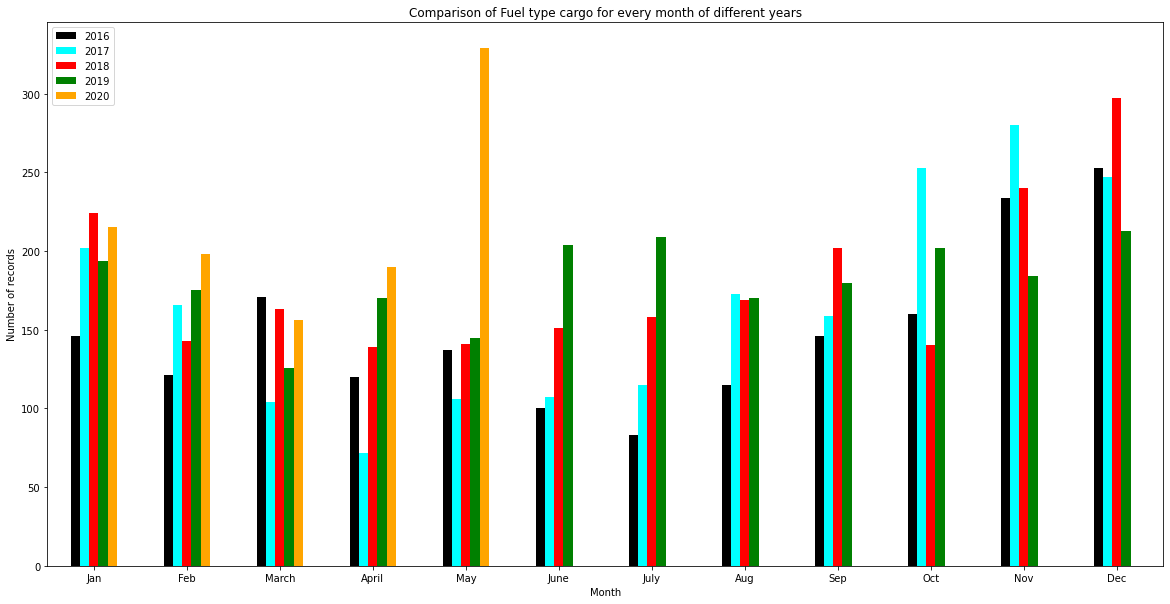

In [31]:
months_name = ['Jan', "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = {}
for i in range(1,13):
    months[i] = 0

    
df_comp_months_fuel = pd.DataFrame({'2016':list(months_2016_fuel.values()),'2017':list(months_2017_fuel.values()), '2018': list(months_2018_fuel.values()), 
                        '2019' :list(months_2019_fuel.values()), '2020' : list(months_2020_fuel.values())
                       }, index = months) #maybe separate months and sort each list or add if in the next line, plot smallest first

ax = df_comp_months_fuel.plot.bar(rot=0, figsize=(20,10), color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of Fuel type cargo for every month of different years")


ax.set_xticklabels(months_name, rotation=0)
plt.xlabel('Month')
plt.ylabel('Number of records');



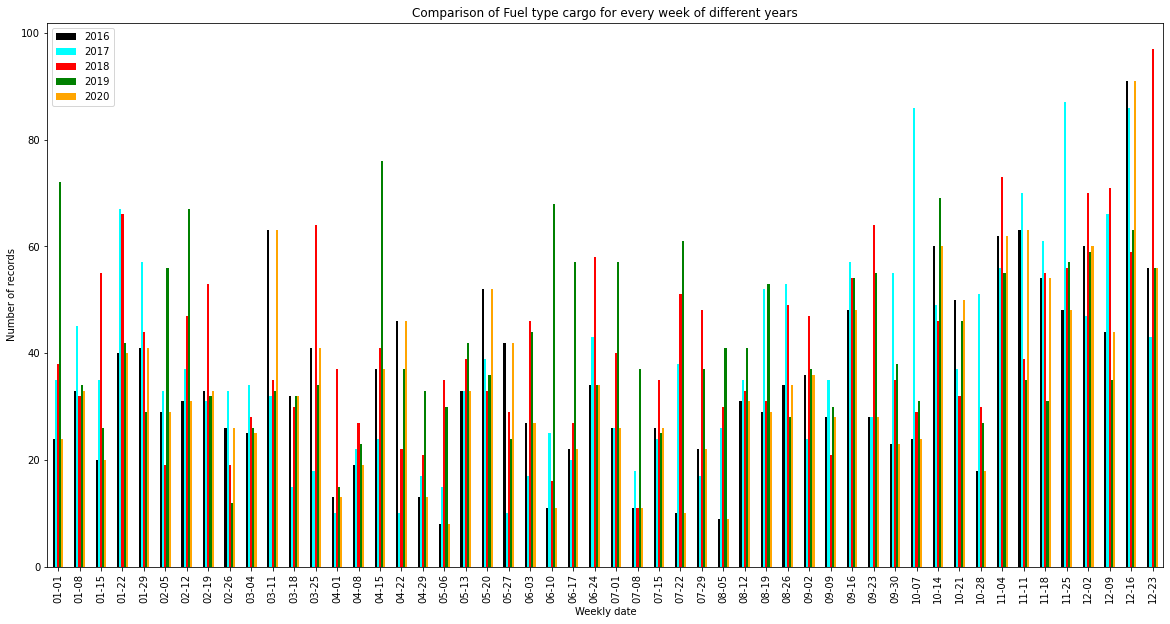

In [32]:
week_dates = []
start_dt = date(2016, 1, 1)
end_dt = date(2016, 12, 31) 
for dt in daterange(start_dt, end_dt):
    week_dates.append(dt.strftime("%m-%d"))

week_dates.remove('12-30') #need to do it only once
df_comp_weeks_fuel = pd.DataFrame({'2016':list(weeks_2016_fuel.values()),'2017':list(weeks_2017_fuel.values()), '2018': list(weeks_2018_fuel.values()), 
                        '2019' :list(weeks_2019_fuel.values()), '2020' : list(weeks_2016_fuel.values())
                       }, index = week_dates)
ax = df_comp_weeks_fuel.plot.bar(rot=0, figsize=(20,10), color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of Fuel type cargo for every week of different years")
ax.set_xticklabels(week_dates, rotation=90)
plt.xlabel('Weekly date') #not necessarly start of the week, it is just comparison of different years within same 7 days
plt.ylabel('Number of records');

In [35]:

def get_dest_origin(df, dest, airports):
    dest_counts = df[df['ship_origin'] == dest]['destination'].value_counts()
    df_counts_dest = pd.DataFrame(dest_counts)
    df_counts_dest = df_counts_dest.reset_index()
    df_counts_dest.columns = ['Destination', 'Number of Records']
    df_counts_dest = df_counts_dest.set_index('Destination')
    dest_list = dest_counts.index.to_list()
    labels_dest = []
    
    for dl in dest_list:
        labels_dest.append(airports[dl])
            
    return df_counts_dest, labels_dest

In [36]:
df_counts_YXL_dest, YXL_dest_labels = get_dest_origin(df, 'YXL', airports)

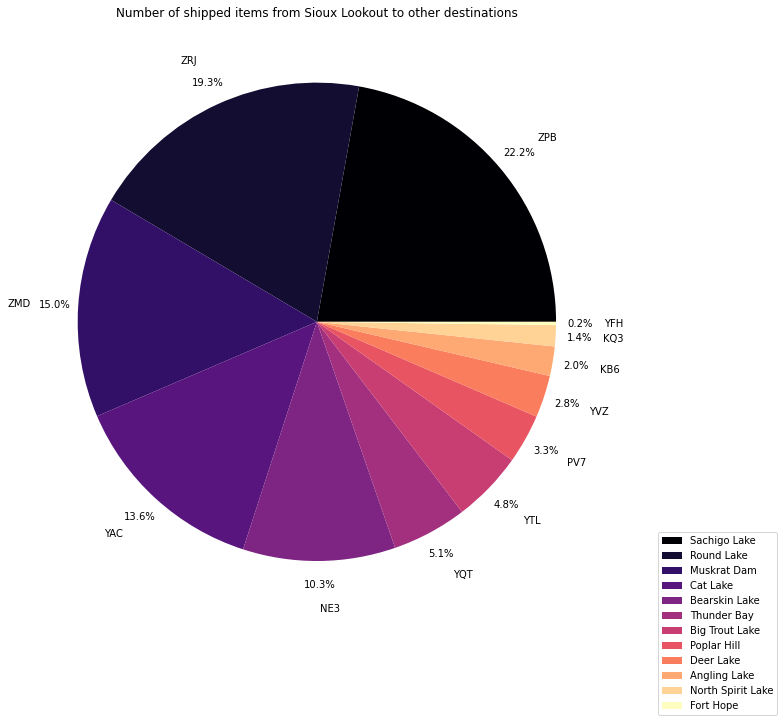

In [37]:
ax = df_counts_YXL_dest[:12].plot.pie(y ='Number of Records', colormap='magma',  autopct='%1.1f%%', title = "Number of shipped items from Sioux Lookout to other destinations", 
                       startangle=0, fontsize = 10, figsize=(11,11), pctdistance=1.1, labeldistance=1.2, ylabel = ''); #labels=None )


ax.legend(YXL_dest_labels,  bbox_to_anchor=(1.1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure);


In [38]:
df_counts_YQT_dest, YQT_dest_labels = get_dest_origin(df, 'YQT', airports)

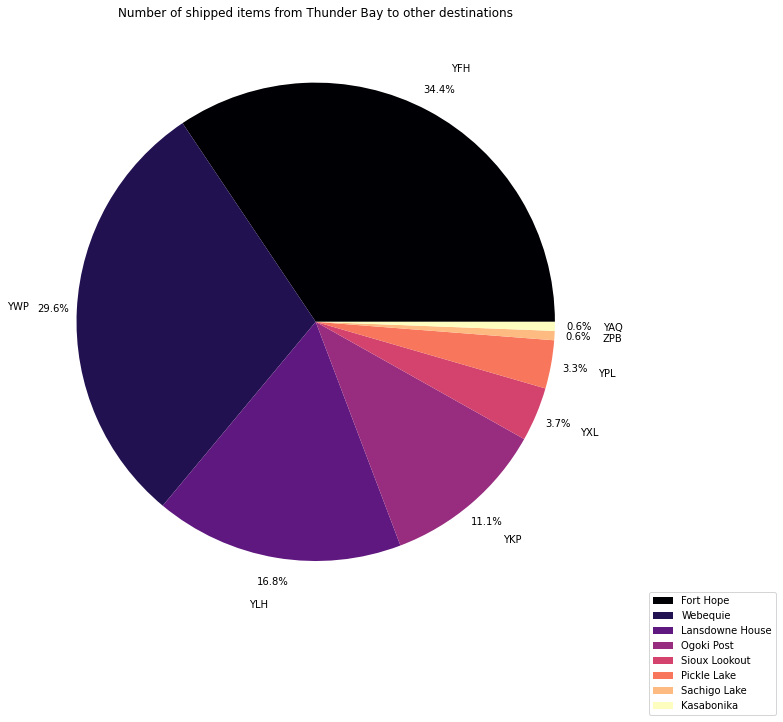

In [39]:
ax = df_counts_YQT_dest[:8].plot.pie(y ='Number of Records', colormap='magma',  autopct='%1.1f%%', title = "Number of shipped items from Thunder Bay to other destinations", 
                       startangle=0, fontsize = 10, figsize=(11,11), pctdistance=1.1, labeldistance=1.2, ylabel = ''); #labels=None )


ax.legend(YQT_dest_labels,  bbox_to_anchor=(1.1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure);

In [42]:
df[(df['ship_origin'] == 'YQT') & (df['ship_destination'] == 'YFH')]['category'].value_counts()

GDRY     9162
FFROZ     602
FDRY      529
GBIGT     516
FFRPR     230
GCNST     227
FPRSH     212
FTBAC      73
FFRMT      66
GPRSH      41
FNFRZ      30
GNFRZ      10
FCHIP       3
Name: category, dtype: int64

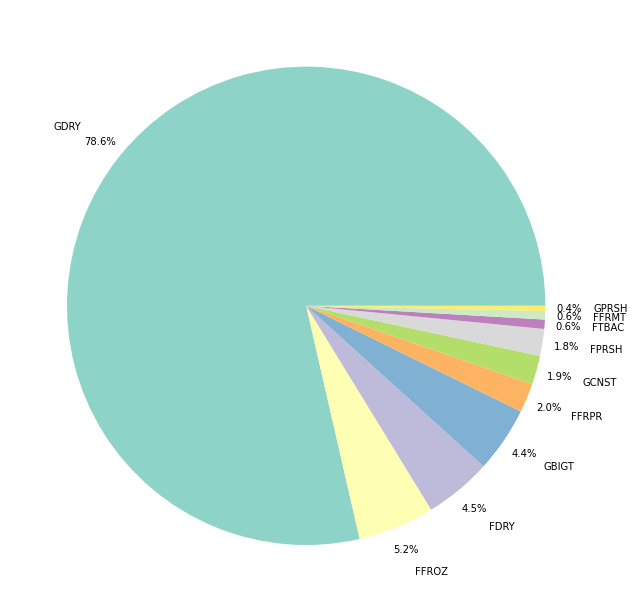

In [43]:
df_counts_YQT_cat = df[(df['ship_origin'] == 'YQT') & (df['ship_destination'] == 'YFH')]['category'].value_counts()
ax = df_counts_YQT_cat[:10].plot.pie(y ='Number of Records', colormap='Set3',  autopct='%1.1f%%', 
                       startangle=0, fontsize = 10, figsize=(11,11), pctdistance=1.1, labeldistance=1.2, ylabel = ''); #labels=None )

#, title = "Category of shipped items from Thunder Bay to Fort Hope"

In [44]:
df[(df['ship_origin'] == 'YQT') & (df['ship_destination'] == 'YFH')& (df['category'] == 'GDRY')]['goods_category'].value_counts()

Mail              7078
Other             1886
General             74
Construction        53
Furniture           42
Transportation      23
Fuel                 6
Name: goods_category, dtype: int64

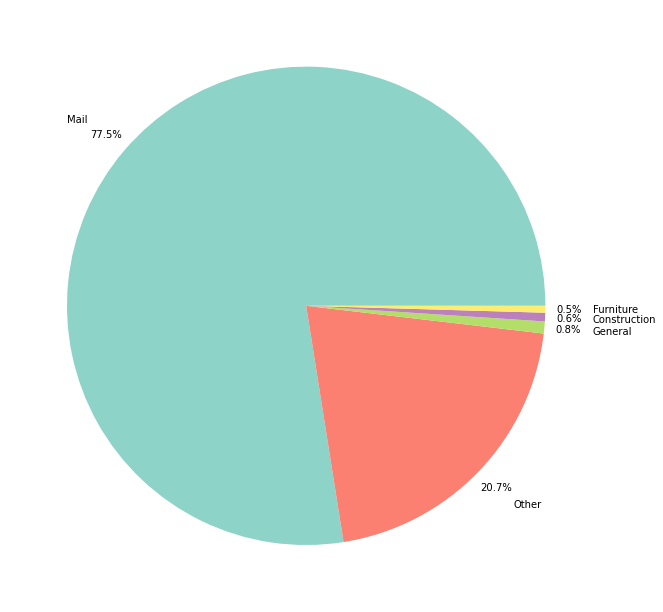

In [45]:
df_counts_YQT_GDRY = df[(df['ship_origin'] == 'YQT') & (df['ship_destination'] == 'YFH')& (df['category'] == 'GDRY')]['goods_category'].value_counts()

ax = df_counts_YQT_GDRY[:5].plot.pie(y ='Number of Records', colormap='Set3',  autopct='%1.1f%%', 
                       startangle=0, fontsize = 10, figsize=(11,11), pctdistance=1.1, labeldistance=1.2, ylabel = ''); #labels=None )

#, title = "Type of top 5 shipped GDRY items from Thunder Bay to Fort Hope"

In [46]:
df_counts_YQT_GDRY

Mail              7078
Other             1886
General             74
Construction        53
Furniture           42
Transportation      23
Fuel                 6
Name: goods_category, dtype: int64

In [47]:
df[(df['ship_origin'] == 'YQT') & (df['ship_destination'] == 'YFH')& (df['category'] == 'GDRY') & (df['goods_category'] == 'Other')]['goods_type'].value_counts()[:20]

SUPPLIES                                             1172
PARTS                                                 169
DIAPERS                                                52
TIRES                                                  46
AUTO PARTS                                             45
XS                                                     41
PAPER                                                  38
FREIGHT                                                21
BINS                                                   18
TOILET PAPER                                           16
UN1791, HYPOCHLORITE SOLUTION, CLASS 8, CORROSIVE      16
STROLLER                                               13
TOYS                                                   10
HOCKEY BAG                                             10
DE-ICE PACKS                                            9
DOG CRATE                                               9
UN1791, CLASS 8, HYPOCHLORITE SOLUTION                  8
PHONE         

In [48]:
df['category'].value_counts() #GCNST

GDRY     95589
FDRY     38735
FFRPR    37652
FFROZ    27185
FPRSH    22511
FCHIP    14772
FNFRZ    12799
GBIGT    10199
GCNST     7872
GPRSH     3327
FTBAC     2226
FFRMT      651
GNFRZ      507
GCNSH        1
Name: category, dtype: int64

Grocery Items

In [49]:
df['is_GPRSH'] = df.category.apply(lambda x: 'GPRSH' in str(x))

In [50]:
df['is_GPRSH'].value_counts()

False    270788
True       3327
Name: is_GPRSH, dtype: int64

In [51]:

def get_data_sub_year(df, col, cat):
    data_weeks = {}
    data_months = {}
    new_name = "is_"+cat
    new_data = "df_"+cat
    df[new_name] = df['category'].apply(lambda x: cat in str(x))
    new_data = df[(df[new_name])]
    li_years = [2016, 2017,2018,2019,2020]
    for r in range(5):
        year = li_years[r] 
        #weeks_name = "weeks_"+str(years)+"_"+cat
        #months_name = "months_"+years+"_"+cat
        weeks_name = get_weeks_year(new_data, year)
        months_name = get_months_year(new_data, year)
        #print(months_name)
        del(weeks_name['12-30'])
        data_weeks[year] = weeks_name
        data_months[year] = months_name


    return new_data, data_weeks, data_months

    

In [52]:
df_GDRY, data_weeks_GDRY, data_months_GDRY= get_data_sub_year(df, 'category', 'GDRY')

In [53]:
df_GDRY, data_weeks_GDRY, data_months_GDRY= get_data_sub_year(df, 'category', 'GDRY')


months_name = ['Jan', "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = {}
for i in range(1,13):
    months[i] = 0
    
week_dates = []
start_dt = date(2016, 1, 1)
end_dt = date(2016, 12, 31) 
for dt in daterange(start_dt, end_dt):
    week_dates.append(dt.strftime("%m-%d"))

week_dates.remove('12-30') #need to do it only once    
df_comp_months_GDRY = pd.DataFrame({'2016':list(data_months_GDRY[2016].values()),'2017':list(data_months_GDRY[2017].values()), '2018': list(data_months_GDRY[2018].values()), 
                        '2019' :list(data_months_GDRY[2019].values()), '2020' : list(data_months_GDRY[2020].values())
                       }, index = months)

df_comp_weeks_GDRY = pd.DataFrame({'2016':list(data_weeks_GDRY[2016].values()),'2017':list(data_weeks_GDRY[2017].values()), '2018': list(data_weeks_GDRY[2018].values()), 
                        '2019' :list(data_weeks_GDRY[2019].values()), '2020' : list(data_weeks_GDRY[2020].values())
                       }, index = week_dates) 
#if error on 53 and 52
#week_dates.remove('12-30') #need to do it only once


In [54]:
ll= list(data_months_GDRY[2019].values())


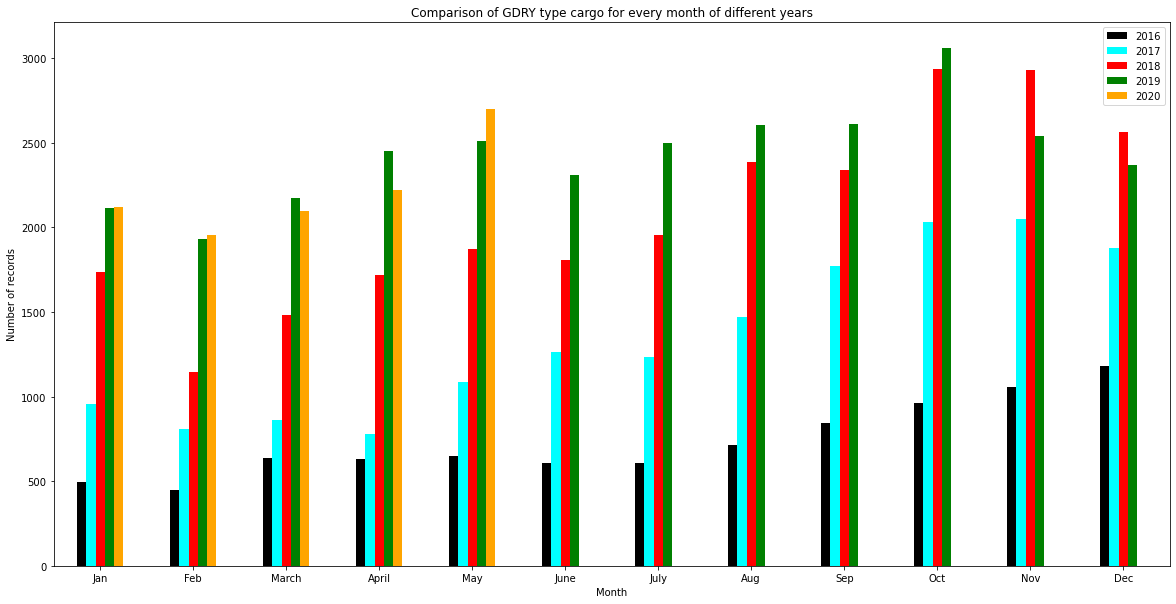

In [56]:

#figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


ax = df_comp_months_GDRY.plot.bar(rot=0, figsize=(20,10),color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of GDRY type cargo for every month of different years")


ax.set_xticklabels(months_name, rotation=0)
plt.xlabel('Month')
plt.ylabel('Number of records');



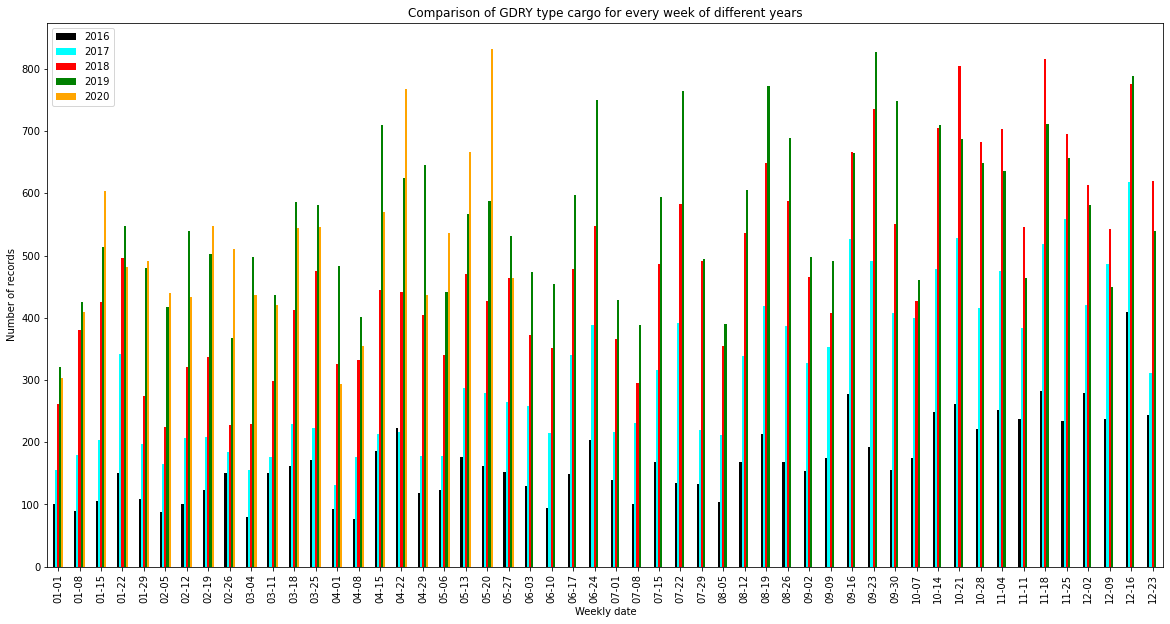

In [57]:

#figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

ax = df_comp_weeks_GDRY.plot.bar(rot=0, figsize=(20,10),color=['black', 'cyan', 'red','green', 'orange'],title = "Comparison of GDRY type cargo for every week of different years")
ax.set_xticklabels(week_dates, rotation=90)
plt.xlabel('Weekly date')
plt.ylabel('Number of records');

In [58]:
df_FPRSH, data_weeks_FPRSH, data_months_FPRSH= get_data_sub_year(df, 'category', 'FPRSH')

months_name = ['Jan', "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = {}
for i in range(1,13):
    months[i] = 0


df_comp_months_FPRSH = pd.DataFrame({'2016':list(data_months_FPRSH[2016].values()),'2017':list(data_months_FPRSH[2017].values()), '2018': list(data_months_FPRSH[2018].values()), 
                        '2019' :list(data_months_FPRSH[2019].values()), '2020' : list(data_months_FPRSH[2020].values())
                       }, index = months) #maybe separate months and sort each list or add if in the next line, plot smallest first


df_comp_weeks_FPRSH = pd.DataFrame({'2016':list(data_weeks_FPRSH[2016].values()),'2017':list(data_weeks_FPRSH[2017].values()), '2018': list(data_weeks_FPRSH[2018].values()), 
                        '2019' :list(data_weeks_FPRSH[2019].values()), '2020' : list(data_weeks_FPRSH[2020].values())
                       }, index = week_dates) #maybe separate months and sort each list or add if in the next line, plot smallest first



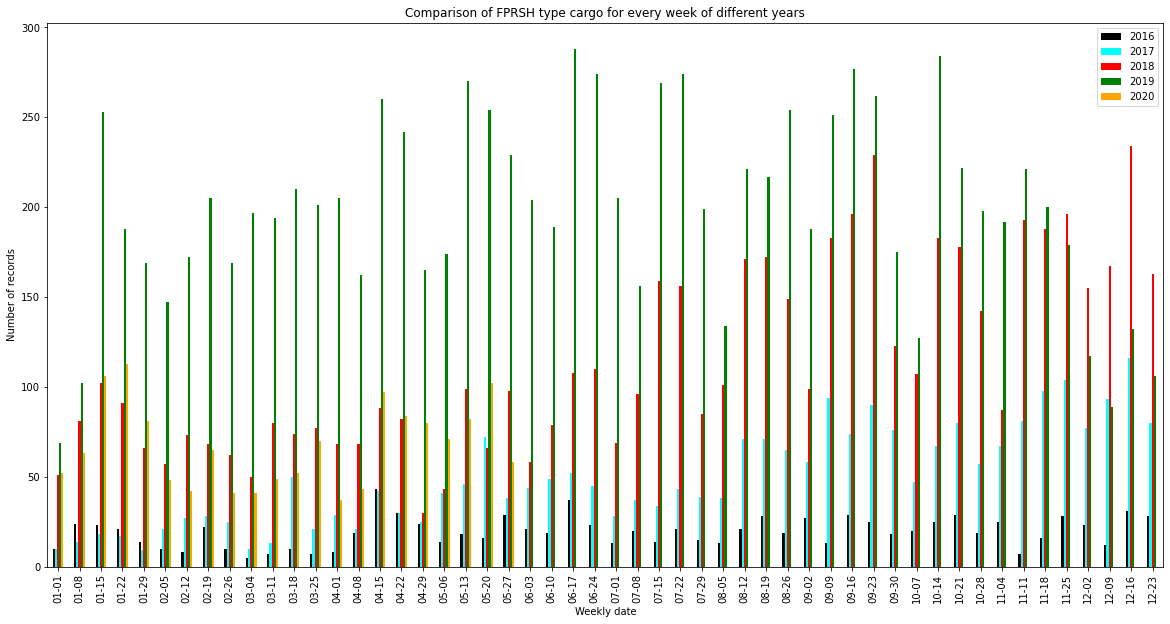

In [59]:


#figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


ax = df_comp_weeks_FPRSH.plot.bar(rot=0, figsize=(20,10),color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of FPRSH type cargo for every week of different years")
ax.set_xticklabels(week_dates, rotation=90)
plt.xlabel('Weekly date')
plt.ylabel('Number of records');

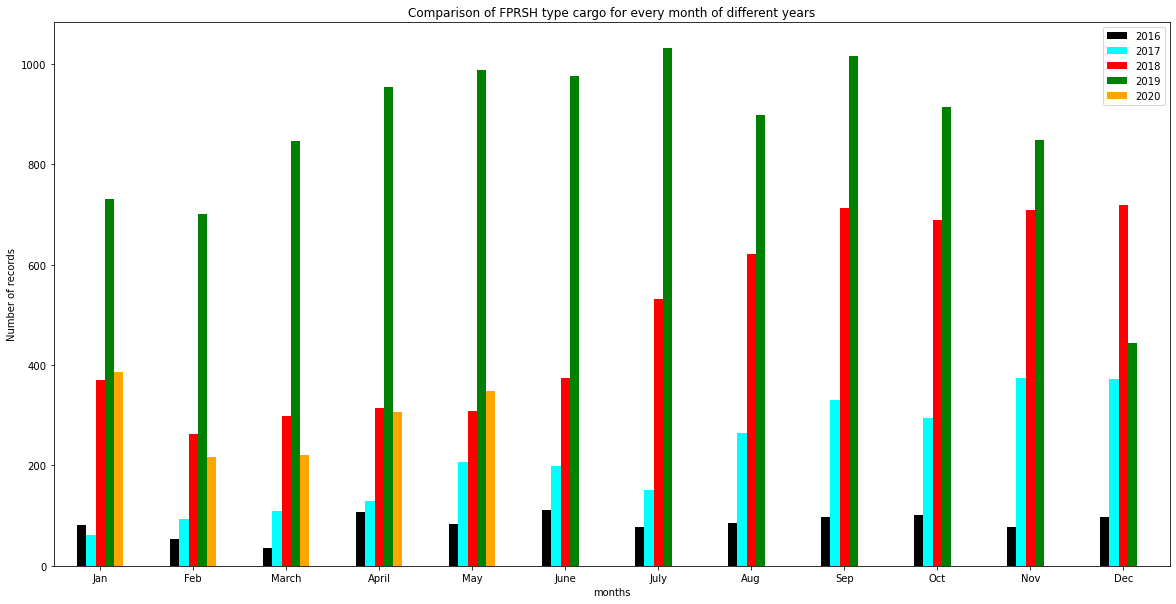

In [60]:
#figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')


ax = df_comp_months_FPRSH.plot.bar(rot=0, figsize=(20,10),color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of FPRSH type cargo for every month of different years")
ax.set_xticklabels(months_name, rotation=0)
plt.xlabel('months')
plt.ylabel('Number of records');

In [61]:
df_FFROZ, data_weeks_FFROZ, data_months_FFROZ= get_data_sub_year(df, 'category', 'FFROZ')


months_name = ['Jan', "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = {}
for i in range(1,13):
    months[i] = 0

df_comp_months_FFROZ = pd.DataFrame({'2016':list(data_months_FFROZ[2016].values()),'2017':list(data_months_FFROZ[2017].values()), '2018': list(data_months_FFROZ[2018].values()), 
                        '2019' :list(data_months_FFROZ[2019].values()), '2020' : list(data_months_FFROZ[2020].values())
                       }, index = months) #maybe separate months and sort each list or add if in the next line, plot smallest first


df_comp_weeks_FFROZ= pd.DataFrame({'2016':list(data_weeks_FFROZ[2016].values()),'2017':list(data_weeks_FFROZ[2017].values()), '2018': list(data_weeks_FFROZ[2018].values()), 
                        '2019' :list(data_weeks_FFROZ[2019].values()), '2020' : list(data_weeks_FFROZ[2020].values())
                       }, index = week_dates) #maybe separate months and sort each list or add if in the next line, plot smallest first



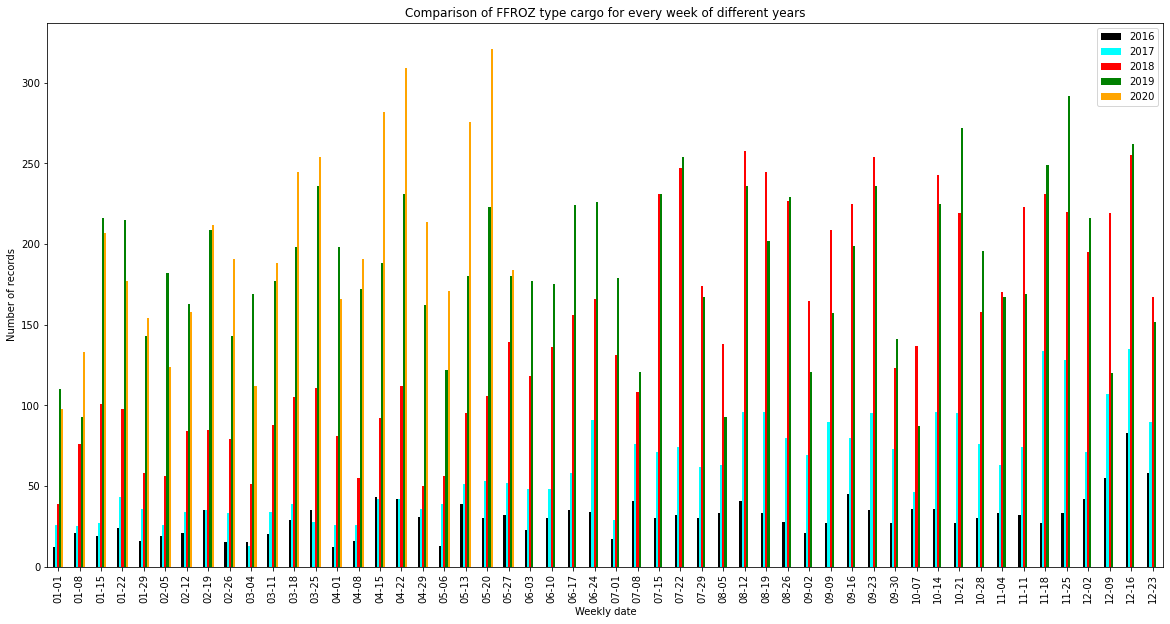

In [62]:
#figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

ax = df_comp_weeks_FFROZ.plot.bar(rot=0, figsize=(20,10),color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of FFROZ type cargo for every week of different years")
ax.set_xticklabels(week_dates, rotation=90)
plt.xlabel('Weekly date')
plt.ylabel('Number of records');

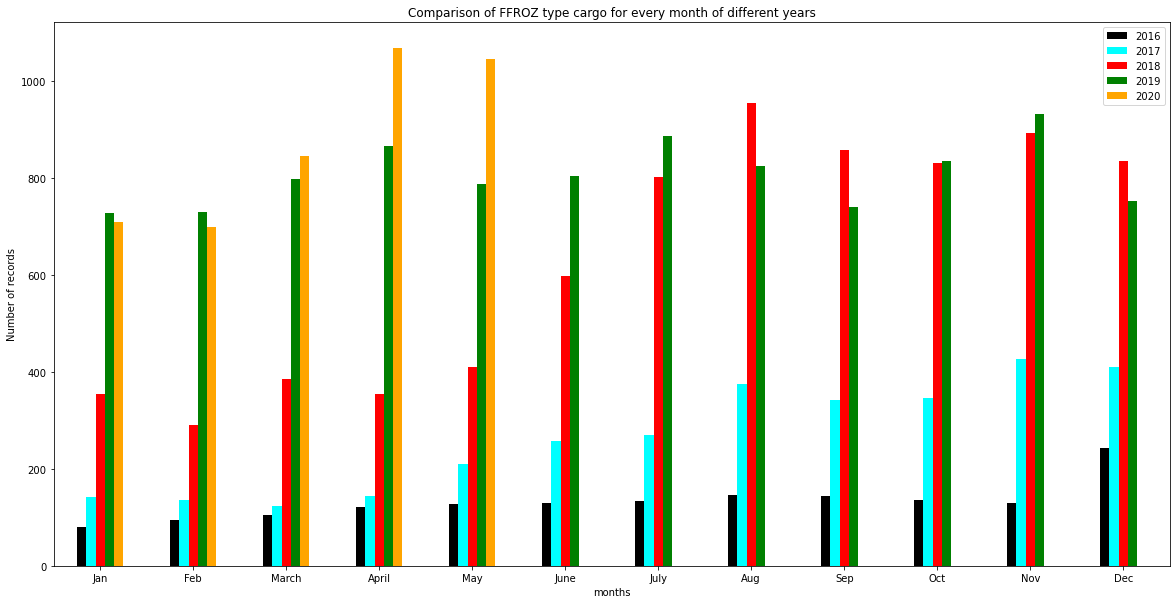

In [63]:

#figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

ax = df_comp_months_FFROZ.plot.bar(rot=0, figsize=(20,10),color=['black', 'cyan', 'red','green', 'orange'], title = "Comparison of FFROZ type cargo for every month of different years")
ax.set_xticklabels(months_name, rotation=0)
plt.xlabel('months')
plt.ylabel('Number of records');

In [64]:
df_comp_months_FFROZ

,2016,2017,2018,2019,2020
1,81,141,355,727,709
2,95,135,290,729,699
3,105,123,386,798,845
4,122,143,354,867,1068
5,128,211,410,787,1046
6,130,258,598,804,0
7,134,270,803,887,0
8,147,375,954,825,0
9,143,342,857,740,0
10,136,346,830,836,0


Seasonality

In [65]:
#drop 2020
months_name = ['Jan', "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = {}
for i in range(1,13):
    months[i] = 0
    
week_dates = []
start_dt = date(2016, 1, 1)
end_dt = date(2016, 12, 31) 
for dt in daterange(start_dt, end_dt):
    week_dates.append(dt.strftime("%m-%d"))

week_dates.remove('12-30') #need to do it only once 

    
df_comp_months_1 = pd.DataFrame({'Date':list(months.keys()),'2016':list(months_2016.values()),'2017':list(months_2017.values()), '2018': list(months_2018.values()), 
                        '2019' :list(months_2019.values())
                       }) #maybe separate months and sort each list or add if in the next line, plot smallest first


df_comp_weeks_1 = pd.DataFrame({'Date': week_dates,'2016':list(weeks_2016.values()),'2017':list(weeks_2017.values()), '2018': list(weeks_2018.values()), 
                        '2019' :list(weeks_2019.values())
                       }) #maybe separate months and sort each list or add if in the next line, plot smallest first


In [66]:
df['date_s']= df['date'].apply(lambda x: '-'.join(str(x).split(' ')[0].split('-')[0:2]))


In [67]:
df['date_s'] = pd.to_datetime(df['date_s'])

In [68]:
df_counts = df['date_s'].value_counts().rename_axis('Date').reset_index(name='Number of Records')

In [69]:
df['is_fuel'] = df.commodity.apply(lambda x: 'FUEL' in str(x))
df_fuel = df[df['is_fuel']]
df_counts_fuel = df_fuel['date_s'].value_counts().rename_axis('Date').reset_index(name='Number of Records')

In [70]:
df_counts

,Date,Number of Records
0,2020-05-01,10119
1,2019-10-01,8736
2,2020-04-01,8646
3,2018-10-01,8230
4,2019-11-01,8067
...,...,...
64,2015-02-01,377
65,2015-03-01,364
66,2014-11-01,353
67,2014-10-01,91


In [71]:
df_counts['Date'].dt.year

0     2020
1     2019
2     2020
3     2018
4     2019
      ... 
64    2015
65    2015
66    2014
67    2014
68    2014
Name: Date, Length: 69, dtype: int64

In [72]:
df_counts = df_counts.set_index('Date')
df_counts_fuel = df_counts_fuel.set_index('Date')


In [73]:
st_date = datetime(2017,1,1)
end_date =datetime(2017,12,31)
df_counts_17 = df_counts[(st_date <= df_counts.index) & (df_counts.index<= end_date)]

In [74]:


matplotlib.rcParams['figure.figsize'] = [20.0,5.0]

Cargo to bases

In [75]:
df_airport = pd.read_excel(r'C:\NS\Airport_codes.xlsx', sheet_name = 'Sheet1')


In [76]:
df_cities = pd.read_csv(r'C:\NS\ON_cities.csv')


In [77]:
df_cities

,City,Population,lat,lon,Province
0,Toronto,5429524,43.653482,-79.383935,ON
1,Ottawa–Gatineau,989567,45.421106,-75.690308,ON
2,Hamilton,693645,43.242529,-79.947042,ON
3,Kitchener,470015,43.453168,-80.494423,ON
4,London,383437,42.983675,-81.249607,ON
...,...,...,...,...,...
281,Palgrave,1044,43.950152,-79.836152,ON
282,Jarvis,1037,42.884471,-80.113941,ON
283,Chalk River,1029,46.081129,-77.606637,ON
284,Iroquois,1027,44.849284,-75.315108,ON


In [78]:
l_origin = list(df.origin.unique())
l_destination = list(df.destination.unique())
l_airports = list(airports.keys())

In [79]:
len(l_origin)

60

In [80]:
df_airport

,Airport Code,Location,Country,Category
0,ANC,"Anchorage, Alaska",USA,Out of scope
1,ACV,"Arcata/Eureka, California",USA,Out of scope
2,YAB,"Arctic Bay, NU",Canada,Far North
3,YEK,"Arviat, NU",Canada,Far North
4,PV8,"Keewaywin, ON",Canada,Ontario - Remote
...,...,...,...,...
181,ZBA,NaN,NaN,Out of scope
182,ZEM,NaN,NaN,Out of scope
183,ZFG,NaN,NaN,Out of scope
184,ZGS,NaN,NaN,Out of scope


In [81]:
for dest in l_destination:
    if dest not in l_airports:
        print(dest,"not is airports")

In [82]:

for ap in airports.keys():
    #print("dict says", airports[ap] )
    #print("df says  ", df_airport['Location'][df_airport["Airport Code"]==ap].values[0] )
    category_check =  df_airport['Category'][df_airport["Airport Code"]==ap].values[0]
    if category_check == "Out of scope":
        print("dict says",ap, "and", airports[ap] )
        #print("df says  ", df_airport['Location'][df_airport["Airport Code"]==ap].values[0] )

dict says YNN and Nejanilini Lake, MB
dict says YCB and Cambridge Bay
dict says YFB and Iqaluit


In [83]:
l_destination = df['destination'].unique()
for dest in l_destination:
    if dest not in airports.keys():
        print(dest)
        #print(df_airport['Category'][df_airport["Airport Code"]==dest].values[0])

In [84]:
# for ap in airports.keys():
#     print("dict says", airports[ap] )
#     print("df says  ", df_airport['Location'][df_airport["Airport Code"]==ap].values[0] )
#     print("df says  ", df_airport['Country'][df_airport["Airport Code"]==ap].values[0], "\n" )

#     category_check =  df_airport['Category'][df_airport["Airport Code"]==ap].values[0]
    
#     if category_check == "Out of scope":
#         print("dict says",ap, "and", airports[ap] )
#         print("df says  ", df_airport['Location'][df_airport["Airport Code"]==ap].values[0] )

Get population of bases with the use of df_cities and manual enteries from website "https://fnp-ppn.aadnc-aandc.gc.ca/fnp/Main/Search/FNPopulation.aspx?BAND_NUMBER=172&lang=eng"

In [85]:
df_pop = pd.read_csv(r'C:\NS\population_data.csv', encoding='utf-8')

In [86]:
#list(df_pop.code.unique())

In [87]:
provinces = {}
provinces['ON'] = "Ontario"
provinces['MB'] = "Manitoba"
provinces['NT'] = "Northwest Territories"
provinces['NU'] = "Nunavut"

In [88]:
origin_li = list(df.origin.unique())

In [89]:
destination_li = list(df.destination.unique())

In [90]:
code_pop_li = list(df_pop.code.unique())

In [91]:
for code_r in origin_li:
    if code_r not in code_pop_li:
        print(code_r, "not in the population list")

In [92]:
provinces_bases = {}
for code_r in airports.keys():
    prov_r = df_pop[df_pop["code"] == code_r].province.values[0]
    provinces_bases[code_r] = prov_r
    #print(code_r, prov_r)

In [93]:
provinces

{'ON': 'Ontario',
 'MB': 'Manitoba',
 'NT': 'Northwest Territories',
 'NU': 'Nunavut'}

In [94]:
prov_codes = {}
for prov in provinces.keys():
    prov_codes[prov]= []
    for code in provinces_bases.keys():
        if provinces_bases[code] == prov:
            prov_codes[prov].append(code)       

In [95]:
ontario_df = df[df['destination'].isin(prov_codes['ON'])]

In [96]:
ontario_df.shape[0]*100/df.shape[0]

58.765846451306935

In [97]:
MB_df = df[df['destination'].isin(prov_codes['MB'])]
MB_df.shape[0]*100/df.shape[0]

23.940681830618537

In [98]:
NT_df = df[df['destination'].isin(prov_codes['NT'])]
NT_df.shape[0]*100/df.shape[0]

0.2422340988271346

In [99]:
NU_df = df[df['destination'].isin(prov_codes['NU'])]
NU_df.shape[0]*100/df.shape[0]

17.051237619247395

In [100]:
df_pop[df_pop["code"] == "YZF"].province.values[0]

'NT'

In [101]:
df['date_str']= df['date'].apply(lambda x: '-'.join(str(x).split(' ')[0].split('-')[0:2]))


In [102]:
df_base1 = df[df['destination']=="YWP"]

In [103]:
def get_data_base(df, base):
    #data_weeks = {}
    #data_months = {}
    #new_name = "is_"+cat
    
    #for base in airports.keys():
        #new_data = "df_"+base
    new_data = df[df['destination']==base]

    df_wt_base = new_data[['wt_shipped']].groupby([new_data['date_str']]).sum()



    return new_data, df_wt_base 
    

In [104]:
df.to_csv(r'C:\NS\cleaned_data.csv', index = False, header=True)


Summary of different types of cargo within different months

In [106]:
# #to check food_list
# for fl in food_list:
#     print(fl)
#     print(df['category'][df['goods_type'] == fl], '/n')
    

In [109]:
df_fuel['is_diesel'] = df_fuel.goods_type.apply(lambda x: "Diesel" in str(x))

In [110]:
df_fuel[['is_diesel']].value_counts()

is_diesel
True         3600
False         879
dtype: int64

In [44]:
tot_value_counts = df.goods_category.value_counts().sort_index()
df_counts_tot = pd.DataFrame(tot_value_counts)
df_counts_tot = df_counts_tot.reset_index()
df_counts_tot.columns = ['Category', 'Number of Records']
df_counts_tot = df_counts_tot.set_index('Category')



In [45]:
df_counts_tot

,Number of Records
Category,
Construction,9326
Electronic,505
Food,149863
Fuel,9990
Furniture,8531
General,17368
Mail,52250
Medical,3162
Other,19931


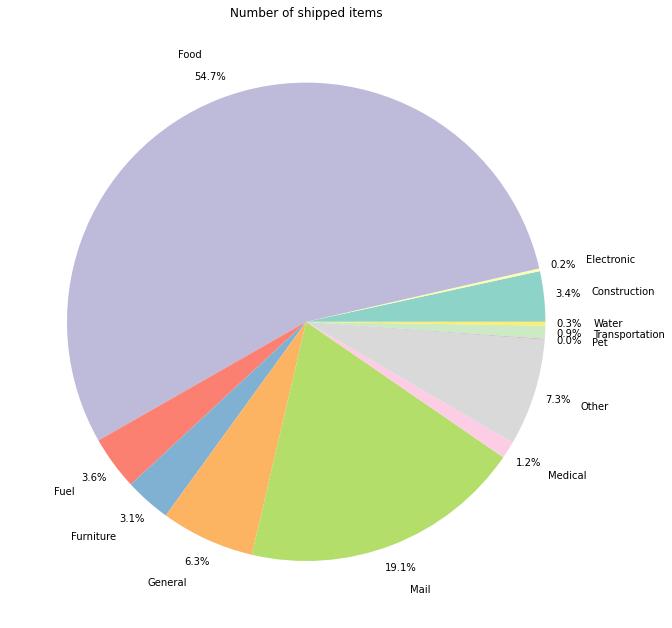

In [57]:
df_counts_tot.plot.pie(y ='Number of Records', colormap='Set3',  autopct='%1.1f%%', legend = False, title = "Number of shipped items", 
                       startangle=0, fontsize = 10, figsize=(11,11), pctdistance=1.1, labeldistance=1.2, ylabel = ''); #labels=None )


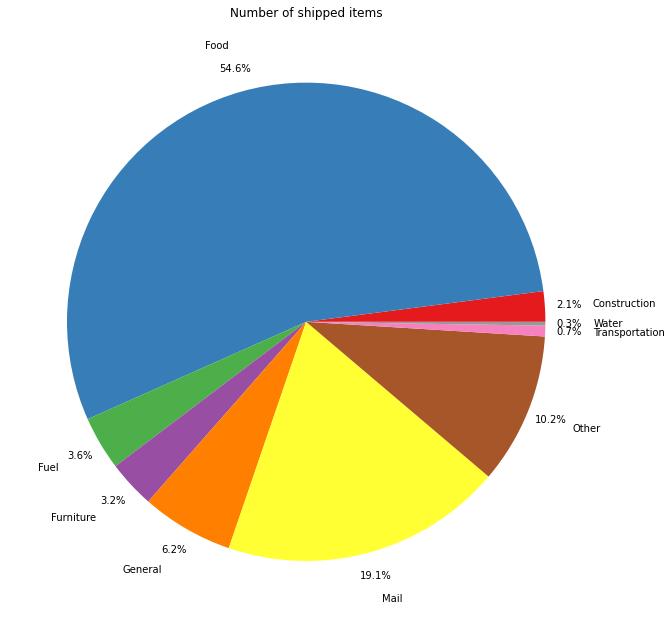

In [113]:
df_counts_tot.plot.pie(y ='Number of Records', colormap='Set1',  autopct='%1.1f%%', legend = False, title = "Number of shipped items", 
                       startangle=0, fontsize = 10, figsize=(11,11), pctdistance=1.1, labeldistance=1.2, ylabel = ''); #labels=None )
